In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Isaac Villada Montoya
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

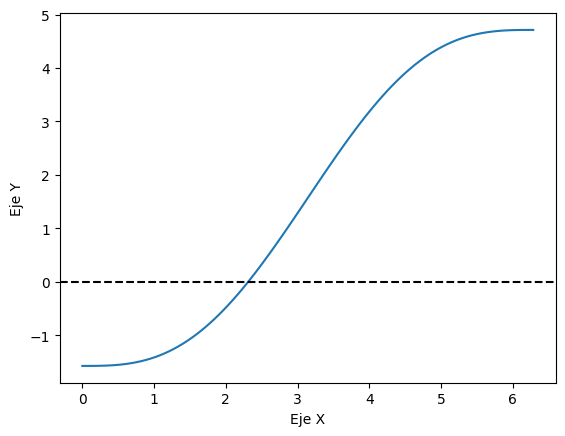

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = x - np.sin(x) - np.pi/2
plt.plot(x, y)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

In [3]:
from scipy.optimize import fsolve, bisect, newton, root_scalar, fixed_point

f = lambda x: x - np.sin(x) - np.pi/2
fpf = lambda x: np.sin(x) + np.pi/2

raiz_b = bisect(f, 1, 3) # Bisección
raiz_p = fixed_point(fpf, 1.5) # Punto fijo
raiz_r = root_scalar(f, x0 = 1.5, method = 'secant') # Secante

x = sp.symbols('x')
f_ = x - sp.sin(x) - sp.pi/2
df = sp.diff(f_, x)
df = sp.lambdify(x, df, 'numpy')
raiz_n = newton(f, 1.5, df) # Newton-Raphson

print(f'La raiz por el método de Bisección será {raiz_b}')
print(f'La raiz por el método de Newton-Raphson será {raiz_n}')
print(f'La raiz por el método de punto fijo será {raiz_p}')
print(f'La raiz por el método de la secante será {raiz_r.root}')

La raiz por el método de Bisección será 2.309881460010729
La raiz por el método de Newton-Raphson será 2.309881460010057
La raiz por el método de punto fijo será 2.3098814600100575
La raiz por el método de la secante será 2.3098814600100575


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

1986.2491

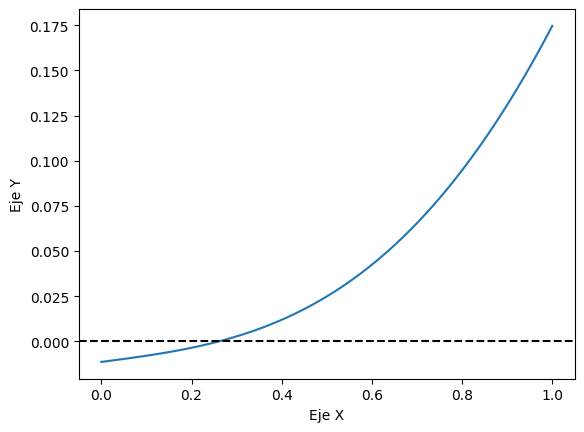

0.26097860477474855


In [4]:
e = 0.9672671
T = 75.96
t_0 = 1986.1113
t_f = 1986.2491


x = np.linspace(0, 1, 100)
y = x - e*np.sin(x) - (2*np.pi/T)*(t_f-t_0)
plt.plot(x, y)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

g = lambda x: x - (e)*np.sin(x) - (2*np.pi/T)*(t_f-t_0)
raiz = newton(g, 1.5)
print(raiz)

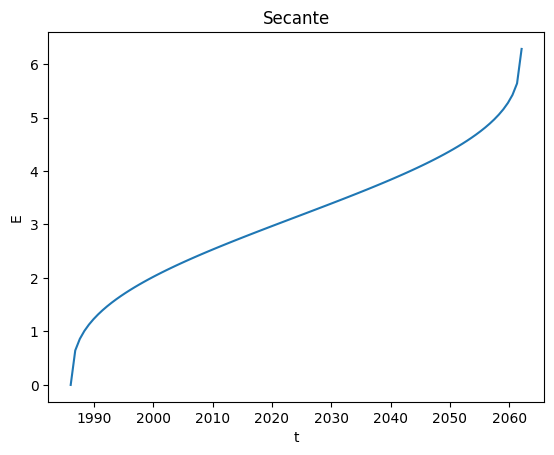

No es posible comparar con Newton ya que por este método no converge


In [13]:
def M(t):
  return 2*np.pi/T*(t-t_0)

t = np.linspace(t_0, t_0 + T, 100)
Mt = M(t)

'''
raices_EN = np.zeros(len(t))
for i in range(len(t)):
  h = lambda E: E - e*np.sin(E) - Mt[i]

  E_ = sp.symbols('E')
  h_ = E_ - e*sp.sin(E_)
  dh = sp.diff(h_, E_)
  dh = sp.lambdify(E_, dh, 'numpy')
  raices_EN[i] = newton(h, 0.5, dh, maxiter = 100)
'''

raices_ES = np.zeros(len(t))
for i in range(len(t)):
  h = lambda E: E - e*np.sin(E) - Mt[i]
  raices_ES[i] = root_scalar(h, x0 = 1.5, method = 'secant').root

y_vals = raices_ES
plt.plot(t, y_vals)
plt.xlabel("t")
plt.ylabel("E")
plt.title("Secante")
plt.show()

print('No es posible comparar con Newton ya que por este método no converge')

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [15]:
m = lambda x: x - np.tanh(x/0.5)
mpf = lambda x: np.tanh(x/0.5)

raiz_m2 = root_scalar(m, x0 = 0.5, method = 'secant')
print(f'Secante {raiz_m2.root:.4g}')

raiz_m3 = fixed_point(mpf, 0.5)
print(f'Punto fijo {raiz_m3:.4g}')

x = sp.symbols('x')
m_ = x - sp.tanh(x/0.5)
dm = sp.diff(m_, x)
dm = sp.lambdify(x, dm,'numpy')
raiz_m1 = newton(m, 0.5, dm)
print(f'Newton {raiz_m1:.4g}')


Secante 0.9575
Punto fijo 0.9575
Newton 0.9575


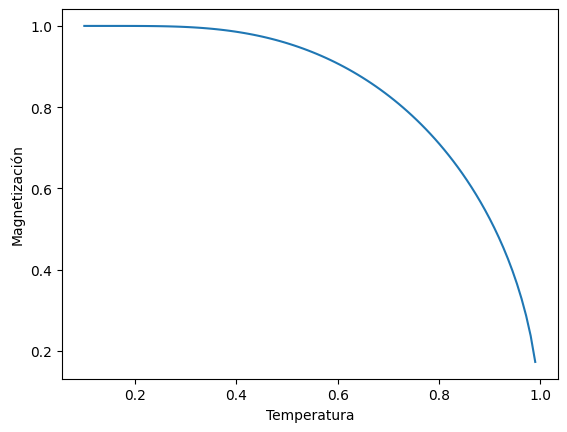

In [14]:
T = np.linspace(0.1,0.99,100)

raices_ENMac = []
for i in T:
  k = lambda m : m - np.tanh(m/i)

  m = sp.symbols('m')
  k_ = m - sp.tanh(m/i)
  dk = sp.diff(k_, m)
  dk = sp.lambdify(m, dk, 'numpy')
  raices_ENMac.append(newton(k, 1.5, dk))

x = T
y = raices_ENMac
plt.plot(x, y)
plt.xlabel("Temperatura")
plt.ylabel("Magnetización")
plt.show()